Источник: http://books.toscrape.com/

1. Напишите функцию, которая парсит одну страницу с книгой. Функция принимает на вход URL, возвращает словарь со всей информацией о книге (включая количество звездочек, ссылку на изображение, доступное количество и жанр). В случае 404 ошибки возбудите ValueError 
2. Напишите функцию, которая обрабатывает одну страницу из каталога книг (возвращает список словарей по каждой из книг).
3. Создайте массив NumPy, содержащий информацию о ценах книг. Магазин вводит скидку 15% на все книги. Найдите минимальную цену книги после введения скидки
4. Создайте массив NumPy, содержащий информацию о количестве книг. Посчитайте общую выручку, которую магазин получит, продав все книги
5. Создайте массив NumPy с закодированными значениями жанра. Магазин вводит скидку на каждый жанр по отдельной. Создайте массив NumPy со значениями скидок (размер массива зависит от кол-ва жанров в выборке). Примените скидку к каждой книге в зависимости от жанра.
6. Соберите словарь вида {жанр: список книг жанра}. Сохраните словарь в формат JSON. Прочитайте файл.
7. Соберите кортеж из двух элементов (список книг, облагаемых налогами; список книг, не облагаемых налогами). Сохраните кортеж в формат Pickle. Считайте файл.
8. Создайте pd.DataFrame, содержащий всю полученную информацию о книгах. Сохраните его в файл xlsx.
9. При помощи xlwings добавьте в xlsx файл столбец с ценой в рублях. Используйте протягиваемые формулы. Курс зафиксируйте на отдельном листе.
10. При помощи xlwings раскрасьте столбец с названием книги. Если в наличии более 20 книг, сделайте заливку зеленым, иначе - желтым.
11. Напишите функцию, которая извлекает из текстов описаний имена собственные. Имя собственное - это слово, начинающееся с заглавной буквы и за которым следует одна или несколько строчных букв. 
12. Представьте каждое описание в виде вектора при помощи TfidfVectorizer. Для каждой пары описаний посчитайте косинусную близость между ними. Визуализируйте результат в виде heatmap.
13. Найдите собственные числа матрицы косинусной близости. Найдите разность между максимальным и минимальным собственным значением. 
14. Используя pandas, найдите самую дорогую книгу в каждом из жанров
15. Используя pandas, разбейте книги на 3 ценовые категории. Для каждой категории посчитайте количество книг с разбивкой по рейтингам.
16. Сохраните данные о книгах в БД sqlite3. Напишите функцию, которая по введенному пользователем названию жанра возвращает кол-во книг в этом жанре.
17. Напишите функцию, которая добавляет новую запись в таблицу. Продемонстрируйте результат
18. Воспользовавшись модулем multiprocessing, соберите информацию о всех книгах с сайта (распаралелльте вычисления по страницам каталога)
18. Воспользовавшись dask.delayed, скачайте изображения книг с сайта (распаралелльте вычисления по страницам каталога) (использование Dask должно приводить к истинной параллельной обработке данных).
19. Сохраните информацию о книгах в формате JSONl с разбивкой на файлы по жанрам.
20. Считайте данные в виде Dask Bag. Посчитайте, для скольких книг описание имеет больше 10 предложений. Выполните задание с использованием dask.bag, распараллелив процесс обработки данных (использование Dask должно приводить к истинной параллельной обработке данных).
21. Сохраните данные о книгах в виде нескольких csv-файлов. Считайте их в виде Dask DataFrame. Выясните, есть ли в датасете книги, на которые оставили хоть один отзыв
22. Посчитайте кол-во обложек книг, которые по ширине больше, чем по длине. Разбейте весь набор файлов на 4 группы и выполните обработку в 4 процесса.

1. Напишите функцию, которая парсит одну страницу с книгой. Функция принимает на вход URL, возвращает словарь со всей информацией о книге (включая количество звездочек, ссылку на изображение, доступное количество и жанр). В случае 404 ошибки возбудите ValueError

In [1]:
#1
import requests
from bs4 import BeautifulSoup as bs

In [2]:
def parse_book(url):
    d = {}
    req = requests.get(url)
    content = bs(req.text, 'lxml')
    if req.status_code != "404":
        inf = list(
                map(
                lambda x: x.text.strip(),
                content.find("ul", {"class":"breadcrumb"}).find_all("li")
                )
            )
        d["title"] = inf[-1]
        d["genre"] = inf[2]
        d["description"] = content.find("meta", {"name":"description"})["content"].strip()
        d["img"] = content.find("div", class_="item active").find("img")["src"]
        d["stars"] = content.find("p", class_="star-rating")["class"][1]
        inf2 = dict(
                    zip(
                        map(
                            lambda x: x.text,
                            content.find("table", class_="table table-striped").find_all("th")
                           ),
                        map(
                            lambda x: x.text,
                            content.find("table", class_="table table-striped").find_all("td")
                            )
                    )
                )
        d.update(inf2)
    else:
        raise ValueError
    return d

2. Напишите функцию, которая обрабатывает одну страницу из каталога книг (возвращает список словарей по каждой из книг).

In [3]:
def parse_page(url):
    lst = []
    req = requests.get(url)
    content = bs(req.text, 'lxml')
    links = list(map(
        lambda x: "http://books.toscrape.com/" + x.find("a")["href"],
        content.find("ol", class_="row").find_all("div", class_="image_container")))
    for link in links:
        lst.append(parse_book(link))
    return lst

In [4]:
url = "http://books.toscrape.com/"
books = parse_page(url)

3. Создайте массив NumPy, содержащий информацию о ценах книг. Магазин вводит скидку 15% на все книги. Найдите минимальную цену книги после введения скидки

In [5]:
import re
import numpy as np

In [6]:
prices = np.array(list(map(lambda x: float(re.findall(r'\d+\.?\d+', x["Price (excl. tax)"])[0]), books)))

In [7]:
min(prices * 0.85)

11.8915

4. Создайте массив NumPy, содержащий информацию о количестве книг. Посчитайте общую выручку, которую магазин получит, продав все книги

In [8]:
availability = np.array(list(map(
    lambda x: int(re.findall(r'\d+', x["Availability"])[0]),
    books
)))

In [9]:
sum(availability * prices)

14819.630000000001

5. Создайте массив NumPy с закодированными значениями жанра. Магазин вводит скидку на каждый жанр по отдельной. Создайте массив NumPy со значениями скидок (размер массива зависит от кол-ва жанров в выборке). Примените скидку к каждой книге в зависимости от жанра.

In [108]:
genres = np.array(list(map(lambda x: x["genre"], books))) # все жанры
genres_set = set(genres) # множество жанров
mask = np.arange(0, len(genres_set)) # маска 
dic = dict(zip(genres_set, mask)) # словарь кодировки
genres_coded = list(map(lambda x: dic[x], genres))
discount = np.random.randint(1, len(genres_set)+1, len(genres_set))
discount

array([ 2, 13, 13,  3, 11, 12,  6,  9, 11, 12,  6,  9, 12])

In [109]:
genres_coded

[2, 12, 4, 6, 5, 3, 8, 7, 7, 2, 7, 2, 3, 9, 10, 10, 2, 1, 11, 0]

In [111]:
discount[genres_coded]

array([13, 12, 11,  6, 12,  3, 11,  9,  9, 13,  9, 13,  3, 12,  6,  6, 13,
       13,  9,  2])

In [110]:
prices * (1 - 0.01 * discount[genres_coded])

array([45.0399, 47.2912, 44.589 , 44.9508, 47.7224, 21.9705, 29.6726,
       16.3163, 20.566 , 45.3705, 12.7309, 17.9742, 16.9362, 46.0152,
       32.9188, 53.815 , 20.7756, 32.7033, 46.7103, 44.2666])

6. Соберите словарь вида {жанр: список книг жанра}. Сохраните словарь в формат JSON. Прочитайте файл.

In [11]:
from functools import reduce
import json

In [12]:
def collect_genres(acc, val):
    if val["genre"] not in acc.keys():
        acc.setdefault(val["genre"], [])
    acc[val["genre"]].append(val["title"])
    return acc

In [13]:
genres_col = reduce(collect_genres, books, {})

In [14]:
with open("genres_col.json", "w") as fp:
    json.dump(genres_col, fp)

In [15]:
with open("genres_col.json", "r") as fp:
    data = json.load(fp)

In [16]:
data

{'Poetry': ['A Light in the Attic',
  'The Black Maria',
  "Shakespeare's Sonnets",
  'Olio'],
 'Historical Fiction': ['Tipping the Velvet'],
 'Fiction': ['Soumission'],
 'Mystery': ['Sharp Objects'],
 'History': ['Sapiens: A Brief History of Humankind'],
 'Young Adult': ['The Requiem Red', 'Set Me Free'],
 'Business': ['The Dirty Little Secrets of Getting Your Dream Job'],
 'Default': ['The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
  'Starving Hearts (Triangular Trade Trilogy, #1)'],
 'Sequential Art': ["Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)"],
 'Music': ['Rip it Up and Start Again',
  'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991'],
 'Science Fiction': ['Mesaerion: The Best Science Fiction Stories 1800-1849'],
 'Politics': ['Libertarianism for Beginners'],
 'Travel': ["It's Only the Hima

7. Соберите кортеж из двух элементов (список книг, облагаемых налогами; список книг, не облагаемых налогами). Сохраните кортеж в формат Pickle. Считайте файл.

In [17]:
def collect_tax_book(acc, val):
    if float(re.findall(r'\d+.?\d+', val["Tax"])[0]) > 0:
        acc[1].append(val["title"])
    else:
        acc[0].append(val["title"])
    return acc

In [18]:
wtax = reduce(collect_tax_book, books, ([], []))

In [19]:
import pickle

In [20]:
with open('wtax.pickle', 'wb') as f:
    pickle.dump(wtax, f)

In [21]:
with open('wtax.pickle', 'rb') as f:
    data = pickle.load(f)

In [22]:
data

(['A Light in the Attic',
  'Tipping the Velvet',
  'Soumission',
  'Sharp Objects',
  'Sapiens: A Brief History of Humankind',
  'The Requiem Red',
  'The Dirty Little Secrets of Getting Your Dream Job',
  'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
  'The Black Maria',
  'Starving Hearts (Triangular Trade Trilogy, #1)',
  "Shakespeare's Sonnets",
  'Set Me Free',
  "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
  'Rip it Up and Start Again',
  'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
  'Olio',
  'Mesaerion: The Best Science Fiction Stories 1800-1849',
  'Libertarianism for Beginners',
  "It's Only the Himalayas"],
 [])

8. Создайте pd.DataFrame, содержащий всю полученную информацию о книгах. Сохраните его в файл xlsx.

In [23]:
prices

array([51.77, 53.74, 50.1 , 47.82, 54.23, 22.65, 33.34, 17.93, 22.6 ,
       52.15, 13.99, 20.66, 17.46, 52.29, 35.02, 57.25, 23.88, 37.59,
       51.33, 45.17])

In [24]:
import pandas as pd

In [25]:
df = pd.DataFrame(books)
df['price'] = prices
df.head()

,title,genre,description,img,stars,UPC,Product Type,Price (excl. tax),Price (incl. tax),Tax,Availability,Number of reviews,price
0,A Light in the Attic,Poetry,It's hard to imagine a world without A Light i...,../../media/cache/fe/72/fe72f0532301ec28892ae7...,Three,a897fe39b1053632,Books,Â£51.77,Â£51.77,Â£0.00,In stock (22 available),0,51.77
1,Tipping the Velvet,Historical Fiction,"""Erotic and absorbing...Written with starling ...",../../media/cache/08/e9/08e94f3731d7d6b760dfbf...,One,90fa61229261140a,Books,Â£53.74,Â£53.74,Â£0.00,In stock (20 available),0,53.74
2,Soumission,Fiction,"Dans une France assez proche de la nÃ´tre, un ...",../../media/cache/ee/cf/eecfe998905e455df12064...,One,6957f44c3847a760,Books,Â£50.10,Â£50.10,Â£0.00,In stock (20 available),0,50.10
3,Sharp Objects,Mystery,"WICKED above her hipbone, GIRL across her hear...",../../media/cache/c0/59/c05972805aa7201171b8fc...,Four,e00eb4fd7b871a48,Books,Â£47.82,Â£47.82,Â£0.00,In stock (20 available),0,47.82
4,Sapiens: A Brief History of Humankind,History,From a renowned historian comes a groundbreaki...,../../media/cache/ce/5f/ce5f052c65cc963cf4422b...,Five,4165285e1663650f,Books,Â£54.23,Â£54.23,Â£0.00,In stock (20 available),0,54.23


In [26]:
df.to_excel("books.xlsx", index=False)

9. При помощи xlwings добавьте в xlsx файл столбец с ценой в рублях. Используйте протягиваемые формулы. Курс зафиксируйте на отдельном листе.

In [27]:
import xlwings as xw

In [28]:
wb = xw.Book("books.xlsx")

In [29]:
sht = wb.sheets['Sheet1']

In [30]:
sht.range('N1').value = 'Price in rubles'

In [31]:
sht.range('N1').api.Font.Bold = True

In [32]:
wb.sheets.add('Sheet2', after='Sheet1')

<Sheet [books.xlsx]Sheet2>

In [33]:
sht2 = wb.sheets['Sheet2']

In [34]:
sht2.range('A1').value = 'Курс фунта к рублю'

In [35]:
sht2.range('A1').api.Font.Bold = True

In [36]:
sht2.range('A2').value = 106.59

In [37]:
rng = sht.range('N2').expand('down').address
sht.range(rng).formula = '=Sheet2!$A$2*Sheet1!M2'

In [41]:
rng = sht.range('N2').get_address()
rng

'$N$2'

10. При помощи xlwings раскрасьте столбец с названием книги. Если в наличии более 20 книг, сделайте заливку зеленым, иначе - желтым.

In [42]:
rng1 = sht.range('K2').expand('down').address

In [43]:
rng2 = sht.range('A2').expand('down').address

In [44]:
for i in rng:
    print(i)
#     if sht.range()
# (255, 255, 0)
sht.range(rng2).color = (173, 255, 47) if sht.range(rng1) == 'In stock (22 available)' else (255, 255, 0)

$
N
$
2


11. Напишите функцию, которая извлекает из текстов описаний имена собственные. Имя собственное - это слово, начинающееся с заглавной буквы и за которым следует одна или несколько строчных букв.

In [41]:
def extract_names(data):
    descriptions = ''.join(list(map(lambda x: x["description"], data)))
    names = re.findall(r'[A-Z][a-zA-Z]+', descriptions)
    return names

12. Представьте каждое описание в виде вектора при помощи TfidfVectorizer. Для каждой пары описаний посчитайте косинусную близость между ними. Визуализируйте результат в виде heatmap.

In [42]:
descriptions = list(map(lambda x: x["description"], books))

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(descriptions)

In [44]:
vectors.shape

(20, 1670)

In [45]:
pairwise_similarity = vectors @ vectors.T

In [46]:
from seaborn import heatmap
import matplotlib as plt

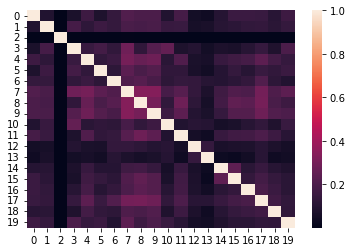

In [47]:
heatmap(pairwise_similarity.toarray());

13. Найдите собственные числа матрицы косинусной близости. Найдите разность между максимальным и минимальным собственным значением.

In [48]:
from numpy.linalg import eig

In [49]:
eigvalues = eig(pairwise_similarity.toarray())[0]
eigvalues.max() - eigvalues.min()

3.2090557727587137

14. Используя pandas, найдите самую дорогую книгу в каждом из жанров

In [50]:
df.head()

,title,genre,description,img,stars,UPC,Product Type,Price (excl. tax),Price (incl. tax),Tax,Availability,Number of reviews,price
0,A Light in the Attic,Poetry,It's hard to imagine a world without A Light i...,../../media/cache/fe/72/fe72f0532301ec28892ae7...,Three,a897fe39b1053632,Books,Â£51.77,Â£51.77,Â£0.00,In stock (22 available),0,51.77
1,Tipping the Velvet,Historical Fiction,"""Erotic and absorbing...Written with starling ...",../../media/cache/08/e9/08e94f3731d7d6b760dfbf...,One,90fa61229261140a,Books,Â£53.74,Â£53.74,Â£0.00,In stock (20 available),0,53.74
2,Soumission,Fiction,"Dans une France assez proche de la nÃ´tre, un ...",../../media/cache/ee/cf/eecfe998905e455df12064...,One,6957f44c3847a760,Books,Â£50.10,Â£50.10,Â£0.00,In stock (20 available),0,50.10
3,Sharp Objects,Mystery,"WICKED above her hipbone, GIRL across her hear...",../../media/cache/c0/59/c05972805aa7201171b8fc...,Four,e00eb4fd7b871a48,Books,Â£47.82,Â£47.82,Â£0.00,In stock (20 available),0,47.82
4,Sapiens: A Brief History of Humankind,History,From a renowned historian comes a groundbreaki...,../../media/cache/ce/5f/ce5f052c65cc963cf4422b...,Five,4165285e1663650f,Books,Â£54.23,Â£54.23,Â£0.00,In stock (20 available),0,54.23


In [51]:
df.groupby('genre')['Price (excl. tax)'].max()

genre
Business              Â£33.34
Default               Â£22.60
Fiction               Â£50.10
Historical Fiction    Â£53.74
History               Â£54.23
Music                 Â£57.25
Mystery               Â£47.82
Poetry                Â£52.15
Politics              Â£51.33
Science Fiction       Â£37.59
Sequential Art        Â£52.29
Travel                Â£45.17
Young Adult           Â£22.65
Name: Price (excl. tax), dtype: object

15. Используя pandas, разбейте книги на 3 ценовые категории. Для каждой категории посчитайте количество книг с разбивкой по рейтингам.

In [52]:
exp = df[df['Price (excl. tax)'] >= 'Â£40']
mid = df[df['Price (excl. tax)'].between('Â£30', 'Â£40')]
cheap = df[df['Price (excl. tax)'] <= 'Â£20']

In [53]:
exp.groupby('stars')['title'].count()

stars
Five     2
Four     1
One      3
Three    2
Two      2
Name: title, dtype: int64

In [54]:
mid.groupby('stars')['title'].count()

stars
Five    1
Four    1
One     1
Name: title, dtype: int64

16. Сохраните данные о книгах в БД sqlite3. Напишите функцию, которая по введенному пользователем названию жанра возвращает кол-во книг в этом жанре.

In [55]:
import sqlite3

In [56]:
con = sqlite3.connect("books.db")
cur = con.cursor()
# cur.close()
# con.close()

In [57]:
df.to_sql('Books', con, if_exists='replace', index=False)

20

In [58]:
def count_genre(gnr):
    sql = """
    SELECT COUNT(title)
    FROM Books WHERE genre = (?)
    """
    res = cur.execute(sql, [gnr])
    return res.fetchmany()[0]

In [59]:
sql = """
    SELECT COUNT(title)
    FROM Books WHERE genre = (?)
"""

In [60]:
gnr = input().capitalize()
count_genre(gnr)

poetry


(4,)

17. Напишите функцию, которая добавляет новую запись в таблицу. Продемонстрируйте результат

In [217]:
def insert_record(vals):
    print(len([*vals]))
    sql = """
        INSERT INTO Books
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
        
    """
    if cur.execute(sql, vals):
        return "запись добавлена"
    return "ошибка"

In [218]:
insert_record(
    ["Alice in Wonderland", "Nowel", "Excellent!",
    None, "Five", None, "Books", "Â£50.77", "Â£50.77",
    "Â£0.00", "In stock (19 available)",
    3, 50.77]
)

13


'запись добавлена'

In [229]:
sql = """SELECT * FROM Books WHERE title = 'Alice in Wonderland'"""
res = cur.execute(sql)
res.fetchone()

('Alice in Wonderland',
 'Nowel',
 'Excellent!',
 None,
 'Five',
 None,
 'Books',
 'Â£50.77',
 'Â£50.77',
 'Â£0.00',
 'In stock (19 available)',
 '3',
 50.77)

18. Воспользовавшись модулем multiprocessing, соберите информацию о всех книгах с сайта (распаралелльте вычисления по страницам каталога)

In [81]:
import multiprocessing

In [82]:
pages = [f'http://books.toscrape.com/catalogue/page-{i}.html' for i in range(1, 51)]

In [261]:
%%file scrap_func_multiprocessing.py
import requests
from bs4 import BeautifulSoup
import re

def parse_book(url):
    req = requests.get(url)
    if req.status_code == 404:
        raise ValueError
    soup = BeautifulSoup(req.content, 'lxml')
    book_info = {}
    try:
        tile = soup.find('div', class_='col-sm-6 product_main')
        book_info['title'] = tile.h1.text
        book_info['rating'] = tile.find('p', class_='star-rating')['class'][1]
        book_info['availability'] = int(re.findall(r'\d+', (tile.find('p', class_='instock availability').text).strip())[0])
        book_info['price'] = float(tile.find('p', class_='price_color').text[1:])
        book_info['genre'] = soup.find('ul', class_='breadcrumb').findChildren()[5].text
        book_info['description'] = soup.find('div', id='product_description').find_next_sibling().text
    except Exception as ex_:
        print(url, ex_)
    return book_info

def scrap_books(page_url):
    req = requests.get(page_url)
    soup = BeautifulSoup(req.content, 'lxml')
    books = soup.find('ol', class_='row').find_all('li')
    book_urls = []
    for book in books:
        book_urls.append(f"http://books.toscrape.com/catalogue/{book.find('a')['href']}")
    res = []
    for URL in book_urls:
        res.append(parse_book(URL))
    return res

Writing scrap_func_multiprocessing.py


In [266]:
from scrap_func_multiprocessing import scrap_books

pages = [f'http://books.toscrape.com/catalogue/page-{i}.html' for i in range(1, 51)]

In [267]:
%%time
with multiprocessing.Pool(processes=multiprocessing.cpu_count()) as pool:
    res = pool.map(scrap_books, pages)

CPU times: total: 46.9 ms
Wall time: 1min 5s


19. Воспользовавшись dask.delayed, скачайте изображения книг с сайта (распаралелльте вычисления по страницам каталога) (использование Dask должно приводить к истинной параллельной обработке данных).

In [91]:
import dask.delayed as delayed
import dask

In [84]:
url = "http://books.toscrape.com/"
req = requests.get(url)
content = bs(req.text, 'lxml')
links = list(map(
        lambda x: "http://books.toscrape.com/" + x.find("a")["href"],
        content.find("ol", class_="row").find_all("div", class_="image_container")))

In [162]:
def get_image(url):
    
    req = requests.get(url)
    content = bs(req.text, 'lxml')
    inf = list(
                map(
                lambda x: x.text.strip(),
                content.find("ul", {"class":"breadcrumb"}).find_all("li")
                )
            )
    title = inf[-1]
    image =  content.find("div", class_="item active").find("img")["src"]
    image_link = re.sub(r'\.\.\/\.\.','http://books.toscrape.com', image)
    with open('book_images/' + title + '.jpg', 'wb') as f:
        f.write(requests.get(image_link).content)

In [163]:
get_image_delayed = delayed(get_image)

In [164]:
res = [get_image_delayed(url) for url in links]

In [165]:
%%time
dask.compute(res, scheduler='processes')

CPU times: total: 0 ns
Wall time: 7.97 s


([None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],)

20. Сохраните информацию о книгах в формате JSONl с разбивкой на файлы по жанрам.

In [116]:
genres = {}
for book in books:
    genres.setdefault(book['genre'], []).append(book)

In [119]:
for k, v in genres.items():
    with open(f'books/{k}.jsonl', 'w') as file:
        json.dump(v, file)

21. Считайте данные в виде Dask Bag. Посчитайте, для скольких книг описание имеет больше 10 предложений. Выполните задание с использованием dask.bag, распараллелив процесс обработки данных (использование Dask должно приводить к истинной параллельной обработке данных).

In [120]:
import dask.bag as db

In [121]:
bag = db.read_text('books/*.jsonl').map(json.loads)

In [131]:
sentences = bag.map(lambda x: x['description'])

In [134]:
bag.compute()

[[{'title': 'The Dirty Little Secrets of Getting Your Dream Job',
   'genre': 'Business',
   'description': "Drawing on his extensive experience evaluating applicants for his marketing agency, and featuring stories based on real-life situations, sample cover letters, resumes, and straightforward advice, Don Raskinâ\x80\x99s The Dirty Little Secrets of Getting Your Dream Job offers all the necessary tools for navigating the tough job market and securing your dream job.Don Raskin owns and Drawing on his extensive experience evaluating applicants for his marketing agency, and featuring stories based on real-life situations, sample cover letters, resumes, and straightforward advice, Don Raskinâ\x80\x99s The Dirty Little Secrets of Getting Your Dream Job offers all the necessary tools for navigating the tough job market and securing your dream job.Don Raskin owns and operates MME, an advertising and marketing agency in New York City. During his twenty-five years at the agency he has intervi

22. Сохраните данные о книгах в виде нескольких csv-файлов. Считайте их в виде Dask DataFrame. Выясните, есть ли в датасете книги, на которые оставили хоть один отзыв

23. Посчитайте кол-во обложек книг, которые по ширине больше, чем по длине. Разбейте весь набор файлов на 4 группы и выполните обработку в 4 процесса.

In [167]:
import dask_image
from dask_image.imread import imread

In [168]:
imgs = imread('book_images\*.jpg')
imgs

dask.array<_map_read_frame, shape=(15, 395, 318, 3), dtype=uint8, chunksize=(1, 395, 318, 3), chunktype=numpy.ndarray>

In [172]:
imgs[0].shape

(395, 318, 3)

In [176]:
res = map(lambda x: 1 if x.shape[1] > x.shape[0] else 0, imgs).sum()
res.compute()

AttributeError: 'map' object has no attribute 'sum'